---
<center> <h1>집값 예측하기</h1> </center>

---

## 1. So... What can we expect?
<br>

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [2]:
df_train = pd.read_csv('train.csv')

In [4]:
pd.options.display.max_columns = 999

In [5]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h2>Analysis discipline</h2>
<br>
- Variable : Variable name.
- Type : Identification of the variables' type. There are two possible values for this field: **'numerical'** or **'categorical'**. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
- Segment : Identification of the variables' segment. We can define three possible segments: **building**, **space** or **location**. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
- Expectation : Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with **'High'**, **'Medium'** and **'Low'** as possible values.
- Conclusion : Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
- Comments : Any general comments that occured to us.

<h2>Ask ourselves : Variable</h2>
<br>
- Do we **think** about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we **care** about its 'Masonry veneer type'?).
- If so, **how important** would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
- Is this information **already** described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).


In [11]:
# 변수가 하도 많아서 그때그때 찾을 수 있도록 딕셔너리로 정리...

var_dic = {
'MSSubClass' : '''판매와 관련된 거주 유형을 식별합니다. 

        20 1-STORY 1946 및 NEWER ALL STYLES
        30 1-STORY 1945 & OLDER
        40 1-STORY W / 종료 ATTIC ALL AGES
        45 1-1 / 2 이야기 - 끝없는 모든 나이
        50 1-1 / 2 이야기 끝난 모든 나이
        60 2-STORY 1946 & NEWER
        70 2-STORY 1945 & OLDER
        75 2-1 / 2 이야기 모든 연령
        80 분리 또는 다중 레벨
        85 SPLIT FOYER
        90 양손 잡이 - 모든 스타일과 연령
       120 1-STORY PUD (계획 단위 개발) - 1946 & NEWER
       150 1-1 / 2 스토리 퍼 - 모든 연령
       160 2-STORY PUD - 1946 & NEWER
       180 PUD - 멀티 레벨 - 스플릿 LEV / FOYER
       190 2 가족 전환 - 모든 스타일과 연령''',
    
'MSZoning' : '''판매의 일반적인 구역 분류를 식별합니다.
  
       농업
       C 상업
       FV 플로팅 빌리지 주거
       내가 산업
       RH 주거 고밀도
       RL 주거 저밀도
       RP 주거 저밀도 공원 
       RM 주거 중간 밀도''',
 
'LotFrontage' : '재산에 연결된 거리의 선형 다리',

'LotArea' : '로트 크기 (스퀘어 피트)',

'Street' : '''부동산에 대한 도로 접근의 유형

       Grvl Gravel 
       포장 된 포장''',
    
'Alley' : '''부동산에 대한 골목 접근 유형

       Grvl Gravel
       포장 된 포장
       NA 골목에 접근 할 수 없음''',
  
'LotShape' : '''재산의 일반적인 모양

       Reg Regular 
       IR1 약간 불규칙
       IR2 보통 불규칙
       IR3 불규칙''',
       
'LandContour' : '''부동산의 평평함

       평평한 / 레벨 근처의 Lvl 
       Bnk Banked - 도로 등급에서 건물까지 신속하고 중요한 상승
       HLS 언덕 - 좌우로 큰 경사
       우울증''',
  
'Utilities': '''사용 가능한 유틸리티 유형
  
       AllPub 모든 공용 유틸리티 (E, G, W, & S) 
       NoSewr 전기, 가스 및 물 (정화조)
       NoSeWa 전기 및 가스 전용
       ELO 전기 만 ''',
 
'LotConfig' : '''로트 구성

       내부 인사이드 로트
       코너 코너 부지
       CulDSac 막 다른 골목
       재산의 양면에 FR2 Frontage
       재산의 3면에 FR3 Frontage''',
 
'LandSlope' : '''부동산의 경사
  
       Gtl 완만 한 경사
       Mod 슬레이트 
       세븐 심한 슬로프''',
 
'Neighborhood' : '''Ames시의 한도 내 물리적 위치

       Blmngtn Bloomington Heights
       Blueste Bluestem
       BrDale Briardale
       브룩 사이드 브룩 사이드
       클리어 크릭 클리어 크릭
       CollgCr College Creek
       크로포드 크로포드
       에드워즈 에드워즈
       길버트 길버트
       IDOTRR 아이오와 DOT 및 철도로드
       초원 V 초원 마을
       미첼 미첼
       북 에임 스 이름
       NoRidge 노스 리지
       NPkVill 노스 파크 빌라
       NridgHt 노스 리지 하이츠
       NWAmes 노스 웨스트 에임즈
       올드 타운 올드 타운
       SWISU 아이오와 주립 대학교의 남서부
       소여 소이어
       SawyerW 소여 웨스트
       소 머스트 서머셋
       StoneBr 돌 브룩
       목재 팀버랜드
       Veenker Veenker''',
   
'Condition1' : '''다양한 조건에 대한 근접성
 
       동맥 간선 도로에 인접
       급전선 급전선 거리에 인접 
       Norm Normal 
       남북 철도 200 분 이내 RRNn
       남북 철도와 인접한 RRAn
       PosN 긍정적 인 오프 사이트 기능 근처 - 공원, 녹지대 등
       PosA 포털 오프 사이트 기능과 인접
       동서 철도의 200 년 이내 RRNe
       동서 철도에 인접한 RRAe''',
 
'Condition2' : '''다양한 조건에 대한 근접성 (둘 이상인 경우)
  
       동맥 간선 도로에 인접
       급전선 급전선 거리에 인접 
       Norm Normal 
       남북 철도 200 분 이내 RRNn
       남북 철도와 인접한 RRAn
       PosN 긍정적 인 오프 사이트 기능 근처 - 공원, 녹지대 등
       PosA 포털 오프 사이트 기능과 인접
       동서 철도의 200 년 이내 RRNe
       동서 철도에 인접한 RRAe''',
 
'BldgType' : '''거주 유형
  
       1 가족 단독 주택 
       2FmCon 2 세대 전환; 원래 한 가족 거주지로 지어졌습니다.
       듀플렉스 듀플렉스
       TwnhsE 타운 하우스 엔드 유닛
       TwnhsI 타운 하우스 내부 단위''',
 
'HouseStyle' : '''주거 스타일
 
       1 이야기 1 이야기
       1.5 층 1 및 2 층 이야기 : 2 레벨 완료
       1.5Unf 1.5 층 : 2 단계 미완성
       2 스토리 2 스토리
       2.5 층 2 층 1/2 층 : 2 층 완공
       2.5Unf 2 층 및 1/2 층 : 2 단계 미완성
       SFoyer 분할 현관
       SLvl 스플릿 레벨''',
 
'OverallQual' : '''하우스의 전반적인 재료와 마감을 평가합니다.

       10 매우 우수함
       9 우수함
       8 아주 좋음
       7 좋은
       6 평균 이상
       5 평균
       평균 이하 4
       3 박람회
       2 가난한
       1 매우 나쁨''',
 
'OverallCond' : '''주택의 전반적인 상태를 평가합니다.

       10 매우 우수함
       우수함
       8 아주 좋음
       7 좋은
       6 평균 이상 
       5 평균
       평균 이하 4 
       3 박람회
       2 가난한
       1 매우 나쁨''',
  
'YearBuilt' : '원래 건설 날짜',

'YearRemodAdd' : '개장 일자 (개조 또는 추가가없는 경우 공사 날짜와 동일)',

'RoofStyle' : '''지붕 유형

       플랫 플랫
       게이블 게이블
       Gambrel Gabrel (헛간)
       엉덩이 힙합
       Mansard Mansard
       창고 창고''',
  
'RoofMatl' : '''지붕 재료

       ClyTile 점토 또는 타일
       CompShg 표준 (복합) 싱글
       멤브레인 막
       금속 금속
       롤 롤
       타르 & Grv 자갈 및 타르
       WdShake 우드 셰이크
       WdShngl 목재 대상 포진''',
  
'Exterior1st' : '''집안의 외장

       AsbShng 석면 포진
       AsphShn 아스팔트 대상 포진
       BrkComm 벽돌 공통
       BrkFace 벽돌 얼굴
       CBlock 콘크리트 블록
       CemntBd 시멘트 보드
       HdBoard 하드 보드
       ImStucc 모조 회 반죽 점토
       MetalSd 금속 사이딩
       기타 기타
       합판 합판
       프리 캐스트 프리 캐스트 
       스톤 스톤
       치장 벽토 치장 용 벽토
       VinylSd 비닐 사이딩
       Wd Sdng 목재 사이딩
       우드 포진 WdShing''',
       
'Exterior2nd' : '''주택의 외장 (둘 이상의 재료 인 경우)

       AsbShng 석면 포진
       AsphShn 아스팔트 대상 포진
       BrkComm 벽돌 공통
       BrkFace 벽돌 얼굴
       CBlock 콘크리트 블록
       CemntBd 시멘트 보드
       HdBoard 하드 보드
       ImStucc 모조 회 반죽 점토
       MetalSd 금속 사이딩
       기타 기타
       합판 합판
       프리 캐스트 프리 캐스트
       스톤 스톤
       치장 벽토 치장 용 벽토
       VinylSd 비닐 사이딩
       Wd Sdng 목재 사이딩
       우드 포진 WdShing''',
 
'MasVnrType' :  '''석조 베니어 유형

       BrkCmn 벽돌 공통
       BrkFace 벽돌 얼굴
       CBlock 콘크리트 블록
       없음 없음
       스톤 스톤''',
 
'MasVnrArea' : '평방 피트 단위의 벽돌 무늬 겉치장',

'ExterQual' : '''외관의 재질 품질을 평가합니다. 
  
       우수한
       좋은 하나님
       TA 평균 / 표준
       FA 박람회
       포 가난한''',
  
'ExterCond' : '''외부의 재질의 현재 상태를 평가합니다.
  
       우수한
       좋은 하나님
       TA 평균 / 표준
       FA 박람회
       포 가난한''',
  
'Foundation' :  '''기초 유형
  
       BrkTil 벽돌 및 타일
       CBlock 콘크리트 블록
       PConc 부어진 Contrete 
       슬래브 슬래브
       스톤 스톤
       우드 우드''',
  
'BsmtQual' : '''지하실 높이를 계산합니다.

       우수 우수 (100+ 인치) 
       좋은 하나님 (90-99 인치)
       TA 표준 (80-89 인치)
       FA 페어 (70-79 인치)
       포 가난 (<70 인치
       없음 지하실 없음''',
  
'BsmtCond ': '''지하실의 일반적인 상태를 평가합니다.

       우수한
       좋은 하나님
       TA Typical - 약간의 습기 허용
       Fa Fair - 습기 또는 일부 균열 또는 침전
       Po Poor - 심한 균열, 침전 또는 젖음
       없음 지하실 없음''',
 
'BsmtExposure' : '''벽이나 정원 수준 벽을 의미합니다.

       Gd 좋은 노출
       Av 평균 노출 (스플릿 레벨 또는 로비는 보통 평균 점수 이상) 
       Mn 최소 노출
       노출 없음
       없음 지하실 없음''',
 
'BsmtFinType1' : '''지하실 완료 지역의 마감 수준

       GLQ 좋은 생활 숙소
       ALQ 평균 생활 숙소
       평균 거주 지역보다 낮은 BLQ 
       평균 Rec Rec 룸
       LwQ 저품질
       Unf Unfinshed
       없음 지하실 없음''',
  
'BsmtFinSF1' : '유형 1 평방 피트 완료',

'BsmtFinType2' : '''지하실 완공 지역의 평가 (여러 유형 인 경우)

       GLQ 좋은 생활 숙소
       ALQ 평균 생활 숙소
       평균 거주 지역보다 낮은 BLQ 
       평균 Rec Rec 룸
       LwQ 저품질
       Unf Unfinshed
       없음 지하실 없음''',

'BsmtFinSF2' : '유형 2 평방 피트 완료',

'BsmtUnfSF' : '지하 공간의 미완성 된 평방 피트',

'TotalBsmtSF' : '지하실 면적의 총 평방 피트',

'Heating' :  '''난방의 종류
  
       층로
       GasA 가스 강제 온풍로
       개스 가스 온수 또는 스팀 열
       중력 중력로 
       온수 또는 가스 이외의 스팀 열
       벽 벽로''',
  
'HeatingQC' : '''난방 품질 및 상태

       우수한
       좋은 하나님
       TA 평균 / 표준
       FA 박람회
       포 가난한''',
  
'CentralAir' : '중앙 에어 컨디셔닝',

'Electrical' :  '''전기 시스템

       SBrkr 표준 회로 차단기 및 Romex
       60AMP 이상의 퓨즈 A 퓨즈 박스 및 모든 Romex 배선 (평균) 
       FuseF 60 AMP 퓨즈 박스 및 주로 Romex 배선 (공정한)
       퓨즈 P 60 AMP 퓨즈 박스 및 대부분 노브 및 튜브 배선 (열악한)
       믹스 믹스''',
  
'1stFlrSF' : '1 층 평방 피트',
 
'2ndFlrSF' : '2 층 평방 피트',

'LowQualFinSF' : '낮은 품질로 완성 된 평방 피트 (모든 층)',

'GrLivArea' : '위의 (지상) 생활 면적 스퀘어 피트',

'BsmtFullBath' : '지하실 샤워 가능 화장실',

'BsmtHalfBath' : '지하 변기와 세면대만 있는 화장실',

'FullBath' : '샤워 가능 화장실',

'HalfBath' : '변기와 세면대만 있는 화장실',

'Bedroom' : '침실 (지하실 침실은 포함되지 않음)',

'Kitchen' :  '부엌',

'KitchenQual' :  '''주방 품질

       우수한
       좋은 하나님
       TA 보통 / 평균
       FA 박람회
       포 가난한''',
        
'TotRmsAbvGrd' : '방 갯수 (욕실 제외)',

'Functional' :  '''집 손상 정도 (공제가 보장되지 않는 한 일반적인 가정)

       Typ 일반 기능
       Min1 마이너 공제 1
       Min2 마이너 공제 2
       Mod 보통 경감
       Maj1 주요 공제 1
       Maj2 주요 공제 2
       Sev 심각하게 손상됨
       매우 심각하게 손상 ''',
  
'Fireplaces' :  '벽난로 수',

'FireplaceQu' : '''벽난로 품질

       Ex Excellent - 탁월한 벽돌 벽난로
       Gd 좋은 - 메인 레벨의 벽돌 벽난로
       TA 평균 - 주거 지역의 조립식 벽난로 또는 지하실의 석조 벽난로
       Fa Fair - 지하실에 조립식 벽난로
       Po Poor - 벤 프랭클린 스토브
       없음 벽난로 없음''',
  
'GarageType' : '''차고 위치
  
       2 유형 두 가지 유형 이상의 차고
       집에 Attchd 부착
       지하실 차고
       BuiltIn Built-In (집안의 차고 부분 - 일반적으로 차고 위에 공간이 있음)
       CarPort 자동차 포트
       Detchd 집에서 분리
       NA 차고 없음''',
  
'GarageYrBlt' : '차고 연식',
  
'GarageFinish' : '''차고 내부 마무리

       지느러미 완료
       RFn 거친 마무리 
       Unf 미완성
       NA 차고 없음''',
  
'GarageCars' : '차고의 차량 수용 정도',

'GarageArea' : '차고의 크기 (평방 피트)',

'GarageQual' : '''차고 품질

       우수한
       좋은 하나님
       TA 보통 / 평균
       FA 박람회
       포 가난한
       NA 차고 없음''',
  
'GarageCond' : '''차고 상태

       우수한
       좋은 하나님
       TA 보통 / 평균
       FA 박람회
       포 가난한
       NA 차고 없음''',
  
'PavedDrive' : '''포장 도로

       Y 포장 
       P 부분 포장
       N 흙 / 자갈''',
  
'WoodDeckSF' : '목재 갑판 면적 (평방 피트)',

'OpenPorchSF' : '오픈 베란다 면적 (평방 피트)',

'EnclosedPorch' :  '내부 현관 면적',

'3SsnPorch' : '3시즌 현관 면적 (평방 피트)',

'ScreenPorch' : '스크린 현관 면적 (평방 피트)',

'PoolArea' : '풀 면적 (스퀘어 피트)',

'PoolQC' : '''풀 품질
  
       우수한
       좋은 하나님
       TA 평균 / 표준
       FA 박람회
       없음 풀 없음''',
  
'Fence' : '''울타리 품질
  
       GdPrv 좋은 개인 정보 보호 정책
       MnPrv 최소 개인 정보
       좋은 우드
       MnWw 최소 목재 / 철사
       NA 담장 없음''',
 
'MiscFeature' : '''기타 범주에서 다루지 않는 기타 기능
  
       엘레베이터
       Gar2 2nd Garage (차고 섹션에 설명이없는 경우)
       기타
       창고 창고 (100 SF 이상)
       TenC 테니스 코트
       없음''',
  
'MiscVal' : '기타 기능의 가치',
    
'MoSold' : '월 판매 (MM)',

'YrSold' : '연도 판매 (YYYY)',

'SaleType' :  '''판매 유형
  
       WD Warranty Deed - Conventional
       CWD 보증 증서 - 현금
       VWD 보증 증서 - VA 대출
       방금 건설 및 판매 된 새로운 주택
       COD 법원 장교의 증서 / 부동산
       콘 계약 15 % 계약금 지급
       ConLw 계약 낮은 선급금과 낮은이자
       ConLI 계약 저리
       축소 계약 체결
       기타''',
  
'SaleCondition' : '''판매 조건

       보통 정상 판매
       Abnorml 비정상적인 판매 - 무역, 유질 처분, 단기 매매
       AdjLand 인접 토지 구입
       Alloca 할당 - 별도의 행위가있는 두 개의 연결된 속성으로, 일반적으로 차고 단위의 콘도 
       가족 간의 가족 판매
       부분 주택은 마지막 평가시 완료되지 않았습니다 (신규 주택과 관련)'''
}

In [14]:
var_dic['OverallQual']

'하우스의 전반적인 재료와 마감을 평가합니다.\n\n       10 매우 우수함\n       9 우수함\n       8 아주 좋음\n       7 좋은\n       6 평균 이상\n       5 평균\n       평균 이하 4\n       3 박람회\n       2 가난한\n       1 매우 나쁨'

<br>
<br>
<br>
<br>
## 2. First things first: analysing 'SalePrice'
<br>

In [15]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

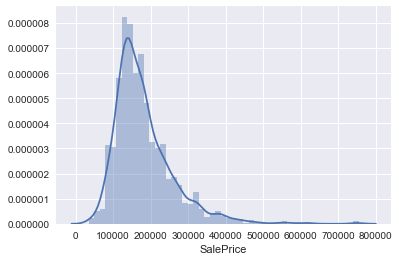

In [16]:
#seaborn

sns.distplot(df_train['SalePrice'])

In [17]:
#cufflinks

df_train['SalePrice'].iplot(kind='hist')

<h2>SalePrice는 전반적으로...</h2>
<br>
- Deviate from the normal distribution. (정규분포에서 벗어난 모양)
- Have appreciable positive skewness. (눈에 띄게 큰 값 쪽으로 꼬리가 길다.. 왜도)
- Show peakedness. (뾰족하다 = 첨도가 통상적으로 3 이상일 때...)


In [18]:
# 왜도와 첨도

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<h2>Relationship with numerical variables</h2>

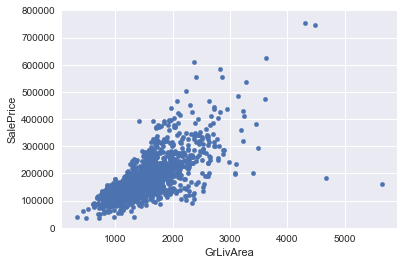

In [19]:
# 지상전용면적과 집값은 선형연관성을 보이는 것 같다

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [32]:
df_train[['SalePrice', 'GrLivArea']].iplot(kind='scatter', mode='markers', x='GrLivArea', y='SalePrice' )

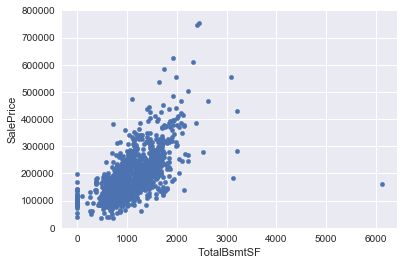

In [33]:
# 지하전용면적과 집값은 선형연관성을 가지는 것 같다

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<h2>Relationship with categorical features</h2>

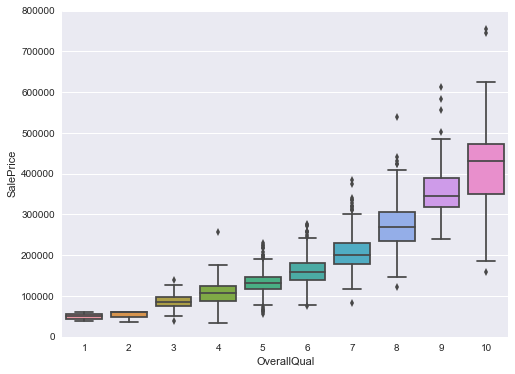

In [34]:
# 전체적 퀄리티와 집값은 강한 상관관계가 있다

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

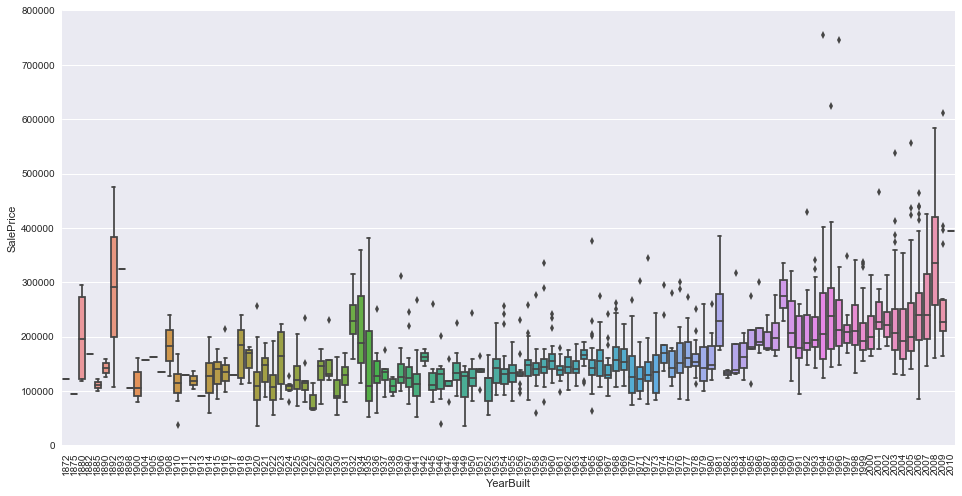

In [35]:
# 연식과 집값은 약한 상관관계가 있다
# 대체로 최근에 지은 집일수록 비싼 경향을 보인다

var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<h2>In summary...</h2>
<br>
- 'GrLivArea' and 'TotalBsmtSF' seem to be **linearly related** with 'SalePrice'. Both relationships are **positive**, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is **particularly high**.
- 'OverallQual' and 'YearBuilt' also seem to be **related** with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

<br>
<br>
<br>
<br>
## 3. Keep calm and work smart
<br>
Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

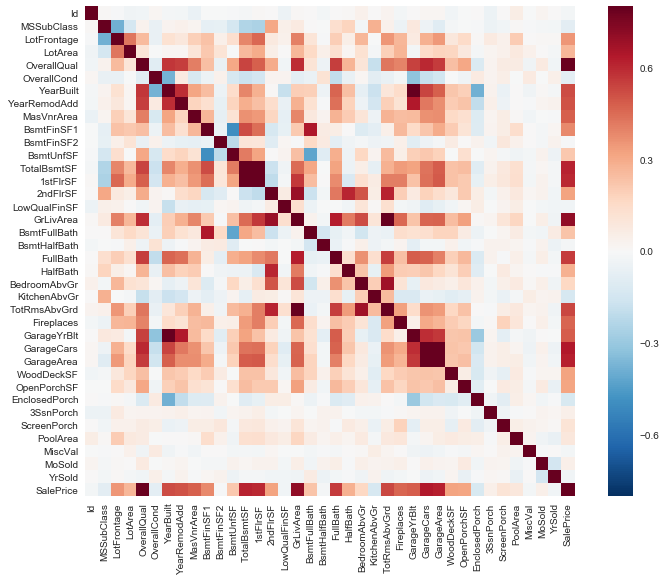

In [36]:
# corr heatmap
# 종속변수와의 상관관계가 높은 변수 관찰
# 다중공선성 제거

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

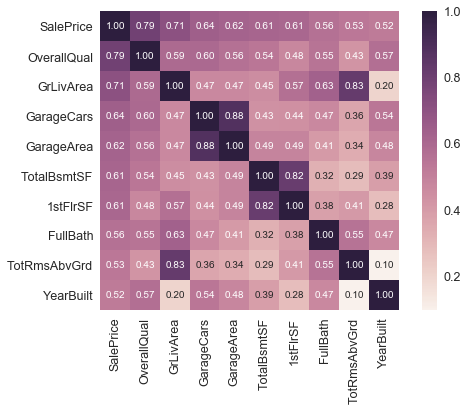

In [37]:
# 상관계수가 높은 상위 10개 변수만 모아보기

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h2>In summary...</h2>
<br>
- 'OverallQual','GrLivArea','TotalBsmtSF'는 집값과 높은 상관관계를 보임.
- Garage와 관련된 변수 두개를 다 쓸 필요는 없음. 나타내는 정보가 비슷하므로 Corr이 더 높은 GarageCars를 사용.
- basement 총면적과 1층 총면적 또한 비슷한 정보이므로 둘 중 하나만 사용, 직관에 의해 basement 총면적을 사용.
- 화장실이 의외로 중요한 변수.
- 방 갯수와 지상전용면적은 역시 비슷한 정보... 지상전용면적만 사용.
- 연식에 대해서는 시계열분석이 필요해보임

## Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

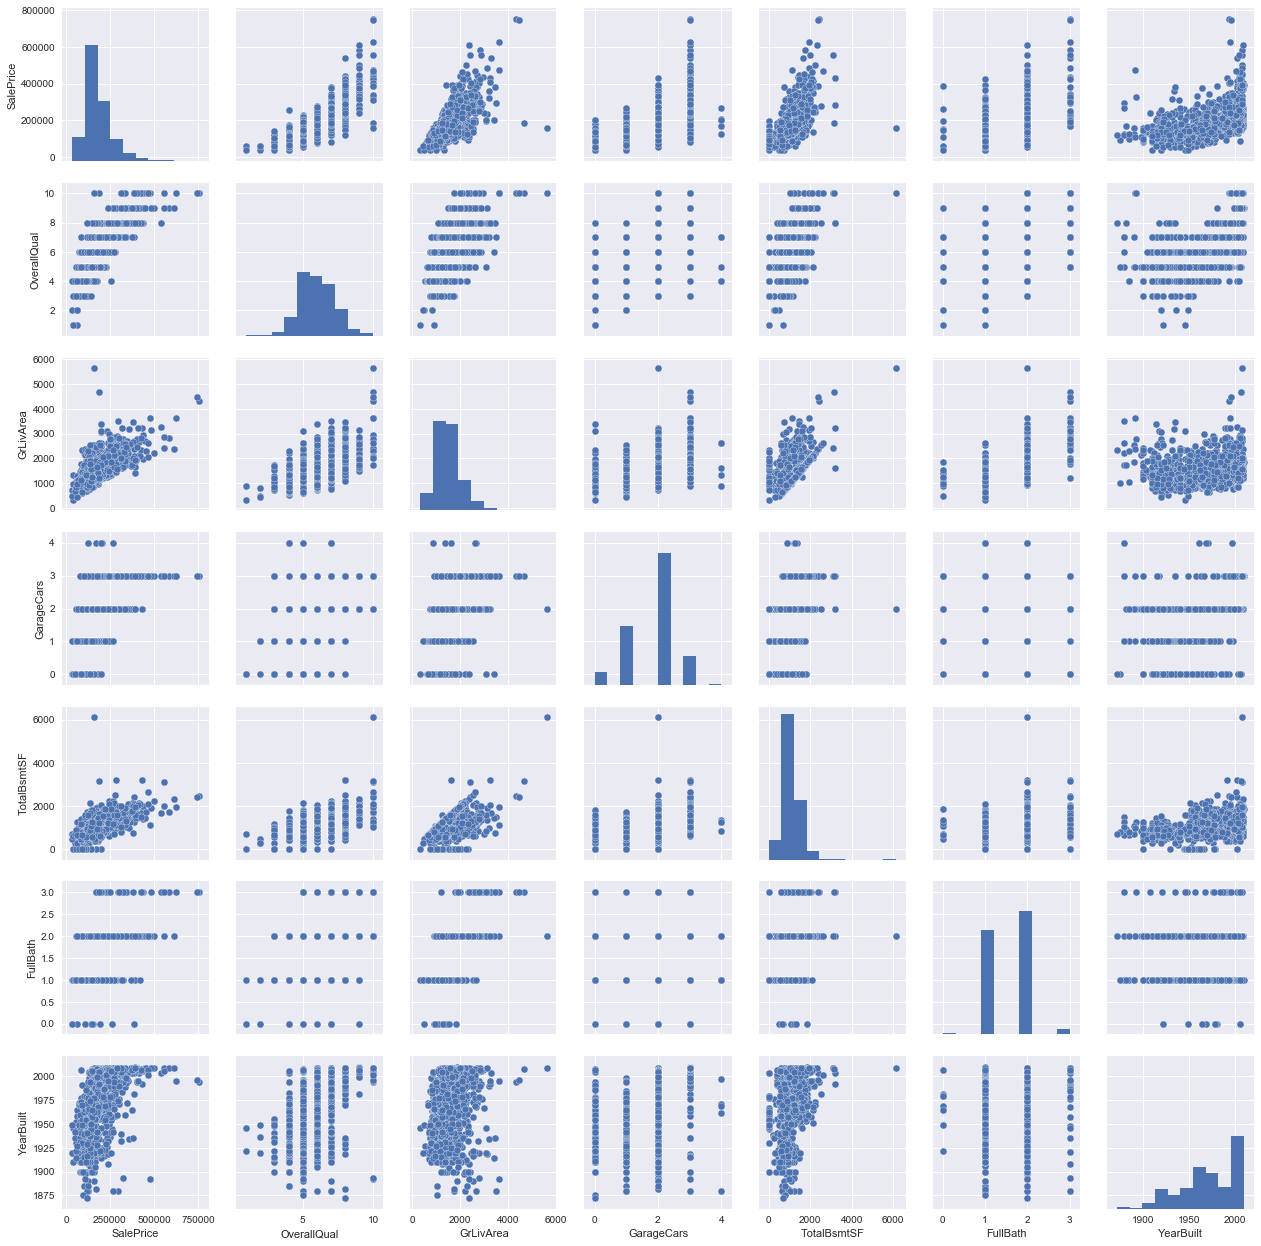

In [39]:
# 변수간 관련성 분석
# 지하 공간과 지상 공간의 상관관계
# 연식과 집값의 그래프는 지수함수의 분포 모양을 보임 (로그 씌울듯)

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

<br>
<br>
<br>
<br>
## 4. Missing data
<br>
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

In [40]:

# 결측치 갯수
total = df_train.isnull().sum().sort_values(ascending=False)
# 결측치 비율
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

<h2>Missing Data Analysis</h2>
<br>
- 15% 이상의 데이터가 손실된 경우 해당 변수는 사용하지 않는다. 
- 삭제되는 변수들은 직관적으로 볼 때 그다지 중요해보이지 않는 변수들이다.
- Garage와 관련된 변수들은 같은 갯수의 결측치를 가짐. 그리고 이미 GarageCars를 사용하기로 했기 때문에 기타 변수는 삭제함. (GarageCars는 결측치 0)
- Basement와 관련된 변수들도 위와 같은 논리를 적용.
- MasVnr은 직관적으로 볼 때 중요하지 않으며 중요 변수와의 연관성도 높아 사용하지 않음.
- Electrical에서의 결측치는 1개뿐이므로 해당 데이터만 지우고 변수로 활용
- 결과적으로 Electrical을 제외한 모든 결측치 포함 변수를 제거

In [ ]:
# 결측치가 1보다 큰 모든 변수 제거
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# Electrical의 결측치 데이터 제거
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# 모든 결측치 제거 확인
df_train.isnull().sum().max()

<br>
<br>
<br>
<br>
## 4-1.  Outliers
<br>
표준편차와 스캐터플랏을 사용...

In [49]:
df_train['SalePrice'][:,np.newaxis]

array([[208500],
       [181500],
       [223500],
       ..., 
       [266500],
       [142125],
       [147500]], dtype=int64)

In [48]:
# 데이터 정규화 (평균 = 0, 표준편차 = 1)

# Series를 Nested array로 변환 후 정규화
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


- Low range는 대체로 모여있고, 0에서 그리 멀지 않은 값들임.
- High range는 0으로부터 먼 값들이고, 7 이상의 값은 정상 범주에서 벗어났다고 여겨짐.

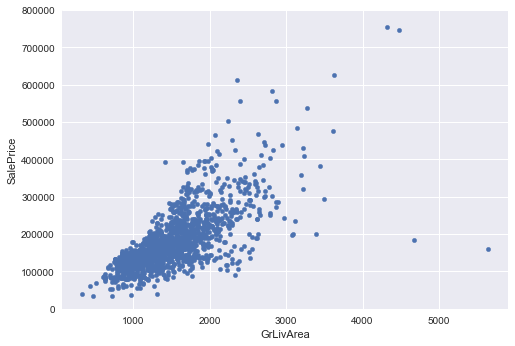

In [54]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 전체적인 경향성에 부합하는지 어긋나는지를 기준으로 특이값 처리
- 지상전용면적이 넓은데도 가격이 저렴한 두 경우는 전체적 경향성에 어긋나므로  예외로 처리하고 삭제.
- 전용면적이 넓고 가격이 특별히 높은 (7.X 이상) 경우는 전체적 경향성에 부합하므로 그대로 남겨둠.

In [55]:
# 특이값 삭제

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

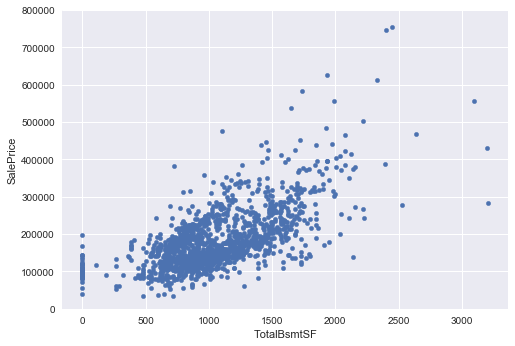

In [56]:
# 지하전용면적 그래프에서는 뚜렷한 특이값이 관찰되지 않음

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<br>
<br>
<br>
<br>
## 5. Getting hard core
<br>

<h2>고려해야 할 4가지 통계적 가정</h2>
<br>
- Normality(정규성) : 데이터가 정규분포의 형태를 보이는지 확인, 단변량 정규성이 다변량 정규성을 의미하지 않는다는 점에 주의. 정규성을 검정하여 다른 여러 문제들을 피해갈 수 있음.
- Homoscedasticity(등분산성) : 모든 종속변수가 같은 error term(오차)을 가지게 하는 것. 선형회귀분석의 기본가정.
- Linearity(선형성) : Scatterplot을 그려서 선형성을 눈으로 확인하는 것이 가장 일반적. 선형성을 만족시키기 위해 변수변환을 하기도 하지만 위 데이터에는 적용하지 않음.
- Absence of correlated errors(상관오차의 부재) : 한 오차가 다른 오차와 연관되어 있는 경우가 없어야 함. 보통 이러한 효과를 설명하는 변수를 추가하는 식으로 해결함.

### SalePrice 정규화

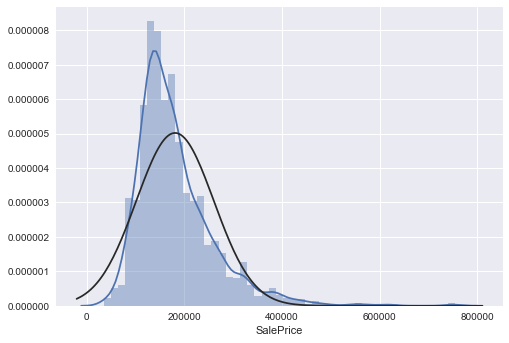

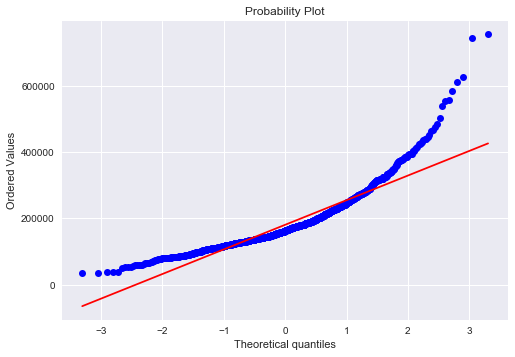

In [62]:
# 정규성을 만족하지 않는 SalePrice

# 정규분포 그래프와 겹친 그래프 그리기
sns.distplot(df_train['SalePrice'], fit=norm);
# QQplot 그리기
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [63]:
# 간단한 변수변환으로 해결 가능

# 모든 값에 로그 씌우기
df_train['SalePrice'] = np.log(df_train['SalePrice'])

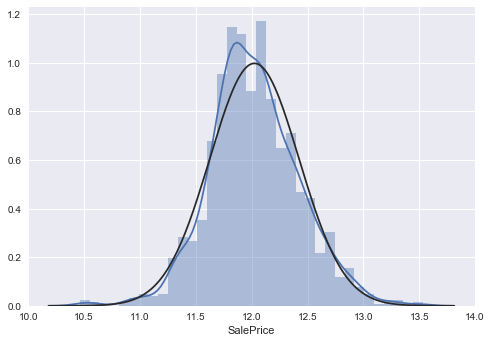

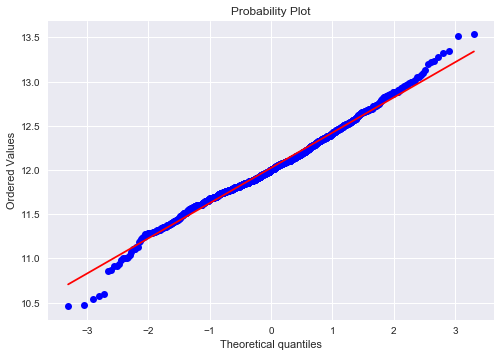

In [64]:
# 정규화되었는지 확인

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### GrLivArea 정규화

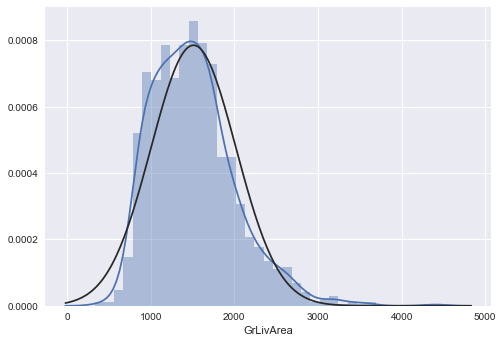

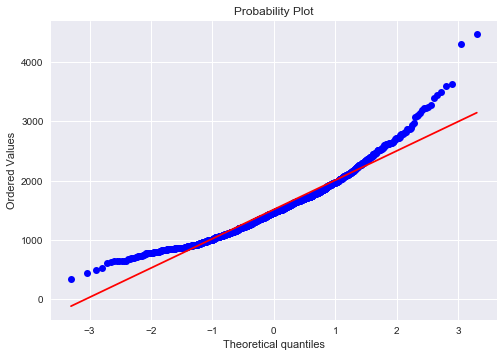

In [65]:
# 왜도가 약간 있는 것으로 확인

sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [66]:
# 정규화
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

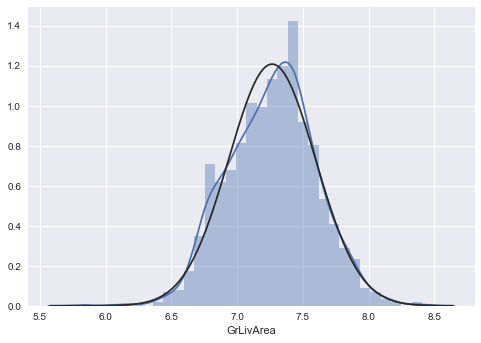

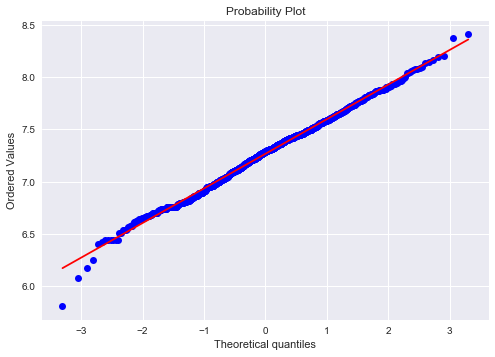

In [67]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

다른 변수도 이처럼 로그 씌워서 정규화...

### TotalBsmtSF 정규화

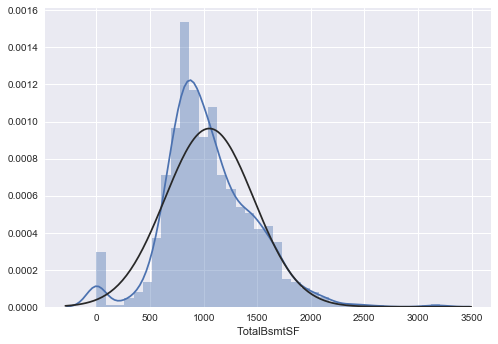

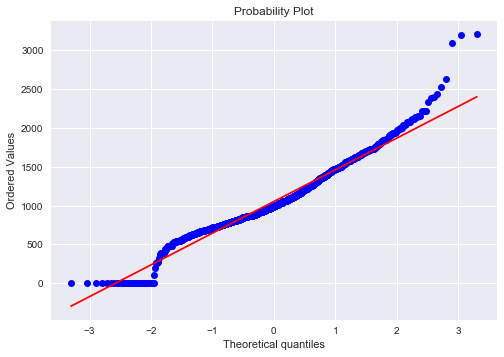

In [68]:

sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

### 문제점?

- 일단 약간의 왜도를 관찰 가능.
- 지하 공간이 없는 집이 상당히 많음 (0에 많은 값들이 몰려있음)
- 0 값의 경우 log transformation이 불가능함

### 해결?

- 지하공간이 있는 집과 없는 집으로 구분하는 binary variable을 설정.
- 지하공간이 있는 집만 log transformation, 지하공간 없는 집은 무시함.

In [69]:
# HasBsmt 라는 binary variable을 만든다

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [70]:
# 지하공간이 0보다 큰 데이터에만 log transformation

df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

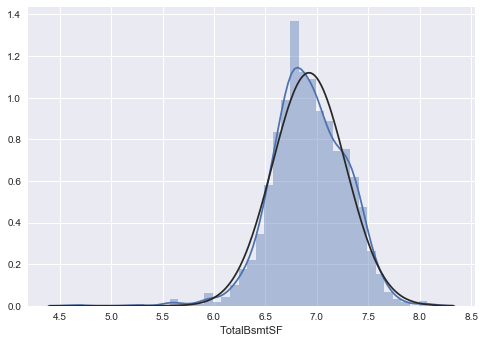

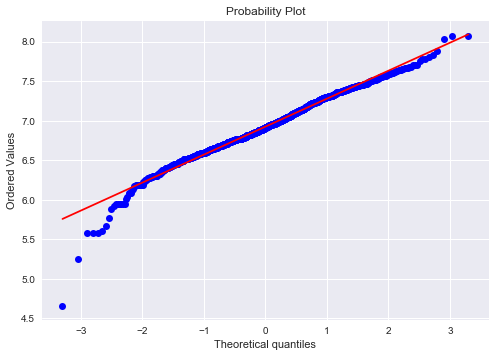

In [71]:
# 결과 확인

sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### 등분산성 검정

- Scatterplot을 그려서 검정한다.
- 특정 패턴을 보일 경우 등분산성을 만족하지 않는 것으로 판단한다.

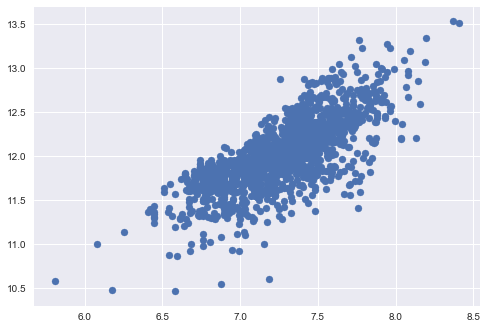

In [72]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

- 정규화 이전과 비교했을 때 더이상 원뿔형 군집이 나타나지 않음.
- 이처럼 정규화를 통해 등분산성 문제까지 해결할 수도 있음.

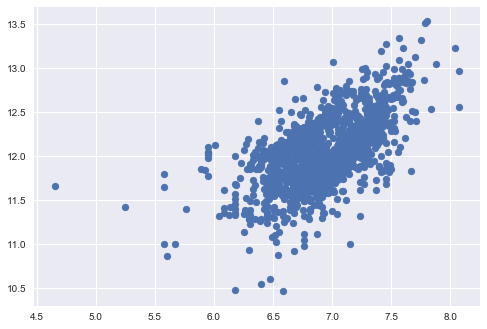

In [73]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

- 역시 군집 형태로 볼 때 등분산성 가정을 만족한다고 말할 수 있음 

# 개인적 총평

- 역시 도메인 지식과 직관이 중요하다는 것을 느꼈다. 
- Correlation을 관찰한 후 Feature selection 하는 것까지는 기존에도 해왔던 작업이지만, 결측치와 특이값 처리는 저번 시간에도 배웠듯이 그 발생 이유에 대해 고민해보는 과정이 꼭 필요하다고 생각했다. 변수 간 관련성, 경향성 등에 유의하여야 한다는 메세지는 전반적으로 유익했다.
- 정규성, 등분산성, 독립성을 iid로 표기했던 것을 상기하며 통계적 가정들을 만족하는지 살펴보는 작업 또한 유익했다. 